1. Accès aux données / Analyse globale

 Lecture : Utilisez fonction read.csv la bibliothèque pandas pour récupérer
les données

In [2]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("../../../data\water_potability.csv")
dataCopy = data.copy()


 Features et samples :
1. En utilisant la fonction dtypes et celles permettant de compter les
valeurs, quelle est la taille du DataSet, le nom des variables et leurs
types.
2. Combien y a-t-il de variables de types (object, int et float).

In [3]:
print(data.dtypes)
# tous les types sont en float64 ou int64
data.shape

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


(3276, 10)

 Modèle et Target :
1. Identifier la target, quel est le type d’apprentissage du modèle
(régression ou classification).
2. Analysez les différentes valeurs de la target.
3. Quelle est la répartition de ces valeurs (pourcentage), y-a-t-il une
répartition équilibrée entre les différentes valeurs.

1/ C'est une classification car on veut savoir si c'est potable ou non.

In [4]:
# 2
data['Potability'].value_counts()
# donc c'est une classification binaire. 
# Une regression est en général pour des valeurs continues. (ex: prix d'une maison)

# 3 
# La répartition est assez équilibrée (2/3, 1/3) pour 80% - 20% de test

Potability
0    1998
1    1278
Name: count, dtype: int64

 Valeurs Nan et doublons :

1. Y a-t-il des doublons.
2. Y a-t-il des valeurs manquantes dans le DataSet. Vous pourrez
pour cela utiliser soit la fonction info, soit la fonction isnull.
3. Créer une liste de toutes les features avec des valeurs manquantes.
Vous pourrez utiliser le boolean indexing basé sur le nombre de
valeurs nulles.
4. Quel est la répartition des valeurs manquantes par rapport à la
target. Vous afficherez le nombre de 0 et de 1 de ces features, ainsi
que le pourcentage de 1 des valeurs manques. Est-ce que ce
pourcentage est très différent du pourcentage de 1 dans tout le
dataSet.

In [5]:
# 1 - doublon
data[data.duplicated()] # utiliser .sum() pour avoir le nombre de dupliqué
data.drop_duplicates(inplace=True)
# non, il n'y a pas de doublon

In [6]:
# 2 - valeurs manquantes :

# axis=1 permet de vérifier s'il y a au moins une valeur manquante (NaN) dans chaque ligne (sample)
data.isna().sum()
# data[data.isna().any(axis=1)].sum()
# oui, il y a des lignes qui contiennent une ou plusieurs valeur manquante

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# 3

dtWithNa = data[data.isna().any(axis=1)]
dtWithNa

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [8]:
# 4

print(dtWithNa['Potability'].value_counts())

print((1998/(1278+1998))*100, "% de 0")
print((798/(798+467))*100, "% de 0 dans les valeurs manquantes")
"les valeurs nulles sont réparties proportionnellement avec le dataset de base."

Potability
0    798
1    467
Name: count, dtype: int64
60.98901098901099 % de 0
63.08300395256917 % de 0 dans les valeurs manquantes


'les valeurs nulles sont réparties proportionnellement avec le dataset de base.'

In [9]:
data.dropna(inplace=True)

Analyse des features :

1. Affichez les statistiques sur les données en utilisant la fonction
describe() que peut-on en conclure en comparant cette analyse avec les statistiques sur les valeurs 1 et 0 de la target. Pensez-vous qu’il y ait des valeurs extrêmes. On considèrera qu’une valeur est
extrême, pour la potabilité, si elle s’écarte de la moyenne de plus de
3 fois la valeur la dispersion (std).
2. Utilisez la fonction boxplot de la bibliothèque seaborn, pour
visualiser la répartition des variables, et confirmer ce qui pouvait
apparaitre sur l’analyse statistique.
3. Comment se répartissent les données en fonction la target, vous
utiliserez pour cela les fonctions histplot ou kdeplot de seaborn. Ces
courbes confirment-elles l’analyse sur les données statistiques.
4. Affichez les taux de corrélation. Pensez-vous que les variables
soient liées entre elles.
5. Utilisez la fonction pairplot avec une séparation des affichages en
fonction de la target (option hue).

In [10]:
data.describe()

# la moyenne de potabilité est de .4 (donc 40% de 1 et 60% de 0)

# il y a moins que le double ou le triple entre la moyenne et le max de chacune
# des colonnes.
# Donc il n'y a pas de valeurs extrêmes

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


<Axes: xlabel='ph', ylabel='Count'>

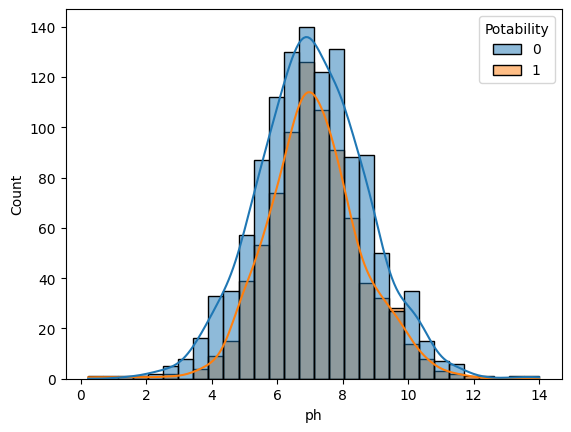

In [11]:
sns.histplot(data=data, x=data["ph"], bins=30, hue=data['Potability'], kde=True)

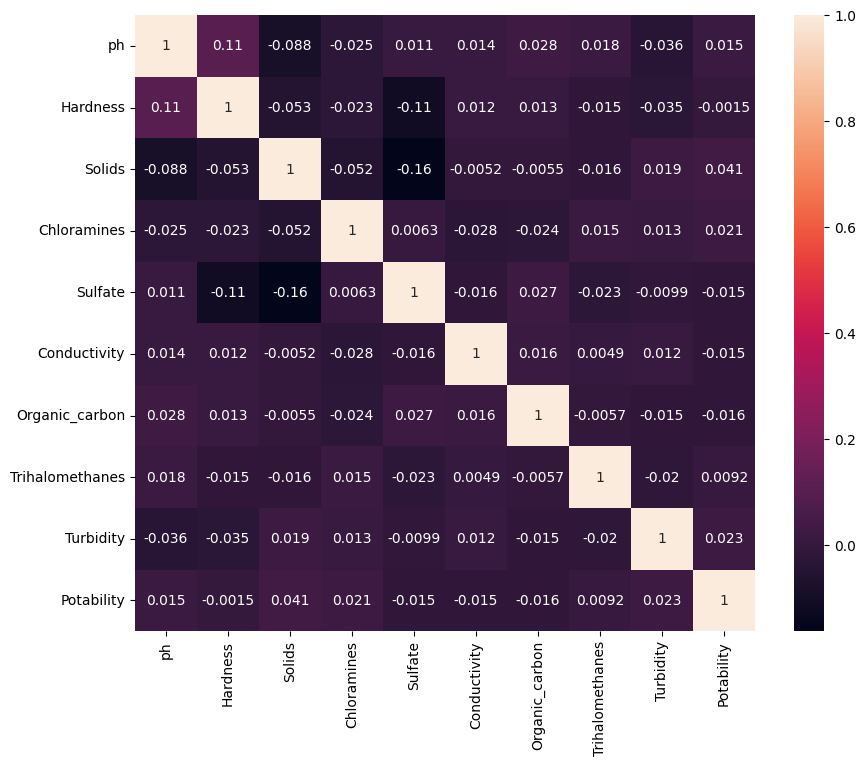

In [12]:
# 4

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

# tout est très proche de 0 : il n'y a que des liens faibles.

2. Premier modèle

-  Données manquantes : Créez une fonction nan_values qui supprime les
données manquantes.
- Split des données : Créez une fonction split_data qui découpe les
données en un testSet et un trainSet avec un taux de 80%. Cette fonction
recevra trois paramètres, un dataFrame, la liste des colonnes sans la
target et la target. Cette fonction retournera les dataFrames créés.

In [ ]:
# train test split : split des données
# 70% d'entrainement, 30% de tests
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Potability', axis=1), data['Potability'], test_size=0.3, random_state=0)

(604, 9)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

maxi = -1
maxii = -1
for i in range(1,10):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    res = (y_pred == y_test).value_counts()
    print(f"i = {i} : \n", res)
    print(f"model score : {model.score(X_test, y_test)}")
    if maxi < int(res.iloc[0]):
        maxi = int(res.iloc[0])
        maxii = i
print(f"i max : {maxii} : {(maxi/len(y_test))*100}")
# 5 de max depts est le meilleur.


i = 1 : 
 Potability
True     372
False    232
Name: count, dtype: int64
model score : 0.6158940397350994
i = 2 : 
 Potability
True     377
False    227
Name: count, dtype: int64
model score : 0.6241721854304636
i = 3 : 
 Potability
True     391
False    213
Name: count, dtype: int64
model score : 0.6473509933774835
i = 4 : 
 Potability
True     391
False    213
Name: count, dtype: int64
model score : 0.6473509933774835
i = 5 : 
 Potability
True     397
False    207
Name: count, dtype: int64
model score : 0.6572847682119205
i = 6 : 
 Potability
True     396
False    208
Name: count, dtype: int64
model score : 0.6556291390728477
i = 7 : 
 Potability
True     382
False    222
Name: count, dtype: int64
model score : 0.6324503311258278
i = 8 : 
 Potability
True     389
False    215
Name: count, dtype: int64
model score : 0.6440397350993378
i = 9 : 
 Potability
True     389
False    215
Name: count, dtype: int64
model score : 0.6440397350993378
i max : 5 : 65.72847682119205


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')
[0.24585196 0.09984395 0.11657015 0.15797622 0.28395182 0.01868278
 0.01354311 0.04645454 0.01712548]


C:\Users\thoma\AppData\Local\Temp\ipykernel_16656\2980259310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="features", data=feat_imp, palette="viridis")


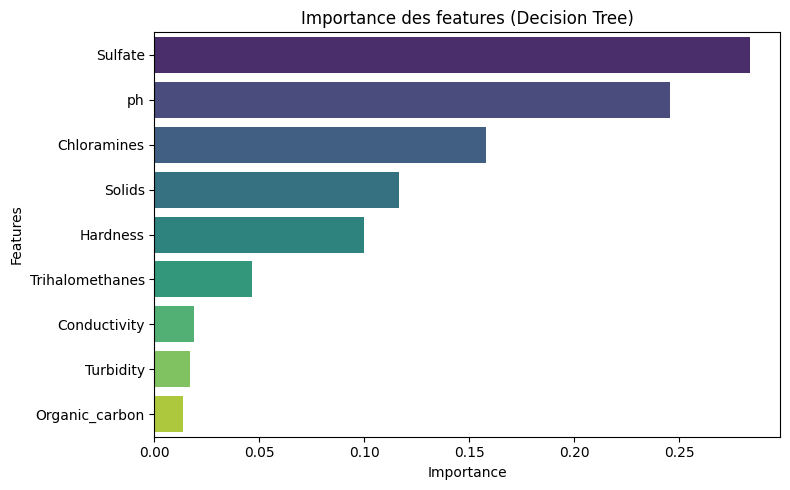

In [86]:
model = DecisionTreeClassifier(max_depth=5, random_state=1)
model.fit(X_train, y_train)

print(X_train.columns)
print(model.feature_importances_)

import matplotlib.pyplot as plt

feat_imp = pd.DataFrame({"features": X_train.columns, "importance": model.feature_importances_})
feat_imp = feat_imp.sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="importance", y="features", data=feat_imp, palette="viridis")
plt.title("Importance des features (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier

res = []
for i in range(5, 15):
    model = RandomForestClassifier(max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    res.append(model.score(X_test, y_test))

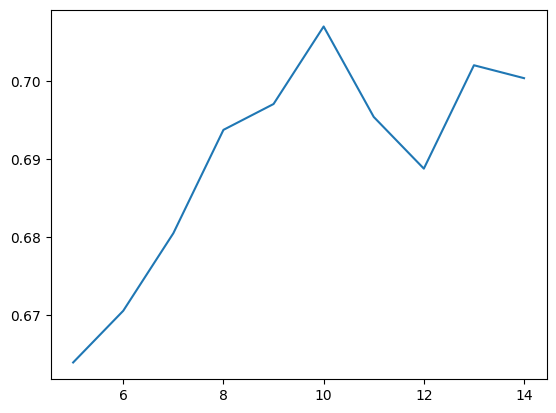

In [122]:
plt.plot(range(5, 15), res)

In [120]:
model = RandomForestClassifier(max_depth=47, n_estimators=200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7152317880794702